STOCK MARKET PREDICTION USING LTSM :project
Arnav Sharma

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

from keras.models import load_model
from keras.layers import LSTM


In [6]:
from tensorflow.keras.utils import plot_model
!pip install pydot

In [8]:
df= pd.read_csv("NFLX.csv")

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-11,438.649994,440.799988,431.040009,440.209991,440.209991,4574600
1,2023-07-12,444.549988,445.410004,437.750000,444.049988,444.049988,5731700
2,2023-07-13,447.000000,451.670013,441.179993,450.380005,450.380005,6157500
3,2023-07-14,452.790009,456.480011,439.700012,441.910004,441.910004,7184900
4,2023-07-17,445.570007,456.679993,445.109985,450.049988,450.049988,6891700


<Axes: >

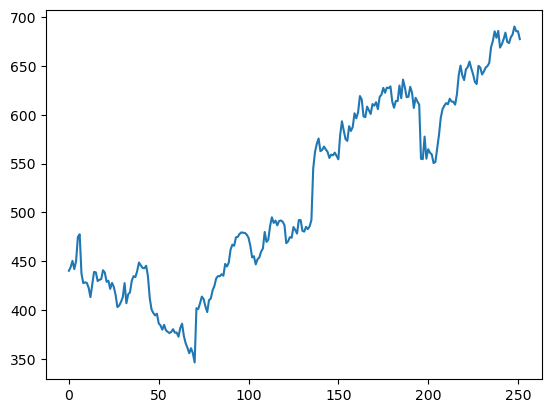

In [12]:
df['Close'].plot()

In [14]:
output_var = pd.DataFrame(df['Adj Close'])
features = ['Open', 'High', 'Low', 'Volume']

In [127]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.258555,0.250977,0.253860,0.118897
1,0.275959,0.264430,0.273596,0.162282
2,0.283186,0.282696,0.283685,0.178247
3,0.300266,0.296732,0.279332,0.216768
4,0.278968,0.297315,0.295244,0.205775


In [128]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [129]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [130]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


C:\Users\arnav\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [131]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 205635.5781 
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 205569.7188
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 205497.6875 
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 205406.2812 
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 205279.1719 
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 205097.8906 
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 204850.0000
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 204518.4531 
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 204097.6250 
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 203581.7188 
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 202966.3438 
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 202248.6406
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 201427.5469 
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 200

In [132]:
y_pred= lstm.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


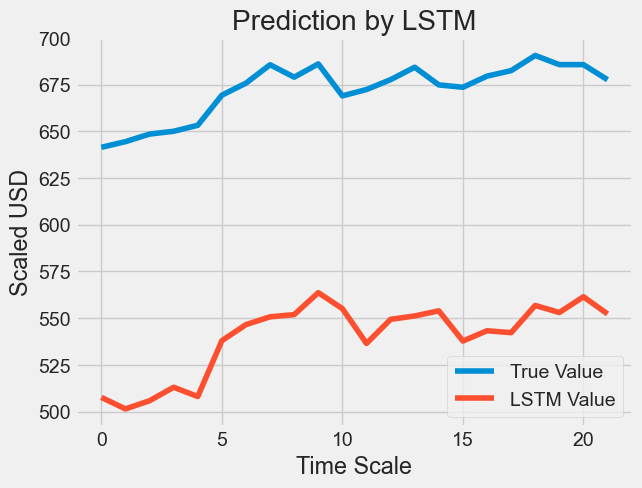

In [133]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()
